# SARS strains and proteins co-occurence

## Protocol

Goal of this notebook is analysis co-occurence of different types, stains of SARS and SARS-related proteins and genes

We are using fantastic labeled dataset by SiBiteLabs:
https://github.com/SciBiteLabs/CORD19

### To do:
1. Buld dataframe from json-files. Output: data frame with columns ['paper_id','block_id','entity_type_1','..','entity_type_n']. Each row matchs a block. Block is a part of paper's abstract or full_text
2. Group SARS strains. Covid-19 is a main group. Output: lists of strains fo each grooup
3. Filter papers related to any of SARS group and build dataframe. Output: dataframe with columns ['paper_id','title','authors','year','SARS strain','CVPROT']. Each row matchs paper.
4. Plot piechart for strains grous: percent of papers (not blocks) mentioned each strains group. Histogram for strains: top 5 most mentioned strains across the groups.
5. Calculate and plot co-ocurence matrix for strains group and proteins (CVPROT). Calcultae andand plot co-ocurence matrix for top 5 most mentioned strains across and proteins (CVPROT). Use data from the block level(not paper)
6. Plot histogram: number of CVPROT mentioned at block level for SARS in general

## 3. Filter Papers, Create DataFrame

In [0]:
#https://www.kaggle.com/maksimeren/covid-19-literature-clustering
#Filter papers related to any of SARS group and build dataframe.
#Input: dataframe of all json files
#Output: dataframe with columns ['paper_id','title','authors','year','SARS strain','CVPROT']. Each row matchs paper.

In [0]:
data = df.fillna('qqqqq')

In [39]:
data['CVPROT'].value_counts()

qqqqq                                        1309117
SPIKE_CVHSA                                     7699
NCAP_CVHSA                                      2827
R1A_CVHSA,R1AB_CVHSA                            2488
VEMP_CVHSA                                      1025
                                              ...   
R1A_CVHSA,SPIKE_CVHSA,NS6_CVHSA                    1
NCAP_CVHSA,AP3A_CVHSA,ORF9B_CVHSA                  1
NS8A_CVHSA,NS8B_CVHSA,NS7B_CVHSA                   1
R1AB_CVHSA,VEMP_CVHSA                              1
R1A_CVHSA,NCAP_CVHSA,R1AB_CVHSA,NS6_CVHSA          1
Name: CVPROT, Length: 222, dtype: int64

In [0]:
#vocab_cvprot (output from upstream processing):

vocab_cvprot = {'': 21,
 'AP3A_CVHSA': 349,
 'NCAP_CVHSA': 4960,
 'NS3B_CVHSA': 90,
 'NS6_CVHSA': 255,
 'NS7A_CVHSA': 93,
 'NS7B_CVHSA': 67,
 'NS8A_CVHSA': 33,
 'NS8B_CVHSA': 20,
 'ORF9B_CVHSA': 165,
 'R1AB_CVHSA': 3095,
 'R1A_CVHSA': 2993,
 'SPIKE_CVHSA': 10329,
 'VEMP_CVHSA': 2258,
 'VME1_CVHSA': 2230,
 'Y14_CVHSA': 25}

In [59]:
vocab = vocab_cvprot.keys()
vocab

dict_keys(['', 'AP3A_CVHSA', 'NCAP_CVHSA', 'NS3B_CVHSA', 'NS6_CVHSA', 'NS7A_CVHSA', 'NS7B_CVHSA', 'NS8A_CVHSA', 'NS8B_CVHSA', 'ORF9B_CVHSA', 'R1AB_CVHSA', 'R1A_CVHSA', 'SPIKE_CVHSA', 'VEMP_CVHSA', 'VME1_CVHSA', 'Y14_CVHSA'])

In [61]:
#remove blanks
vocab = list(vocab)
vocab = vocab[1:]
vocab

['AP3A_CVHSA',
 'NCAP_CVHSA',
 'NS3B_CVHSA',
 'NS6_CVHSA',
 'NS7A_CVHSA',
 'NS7B_CVHSA',
 'NS8A_CVHSA',
 'NS8B_CVHSA',
 'ORF9B_CVHSA',
 'R1AB_CVHSA',
 'R1A_CVHSA',
 'SPIKE_CVHSA',
 'VEMP_CVHSA',
 'VME1_CVHSA',
 'Y14_CVHSA']

In [86]:
sars_paper_id = {'PAPER_ID': [], 'SARS_COV': [],'SPECIES': [],'CVPROT': []}
for i in range(0, data.shape[0]):
  row = data.iloc[i]
  prot_field = row['CVPROT']
  prot_field = str(prot_field)
  prot_field = prot_field.split(',')
  for prot in prot_field:
    if prot in vocab:
      paper_id = row['paper_id']
      SARS_cov = row['SARSCOV']
      species = row['SPECIES']
      sars_paper_id['PAPER_ID'].append(paper_id)
      sars_paper_id['SARS_COV'].append(SARS_cov)
      sars_paper_id['SPECIES'].append(species)
      sars_paper_id['CVPROT'].append(prot)
  
df_cvprot = pd.DataFrame(sars_paper_id, columns=['PAPER_ID', 'SARS_COV', 'SPECIES', 'CVPROT'])
df_cvprot.head()

,PAPER_ID,SARS_COV,SPECIES,CVPROT
0,39ab0e9d7a93e6a7483bf4851e69cd66d2653256,Severe acute respiratory syndrome coronavirus 2,"Coronavirus,Viruses,Insect",SPIKE_CVHSA
1,39ab0e9d7a93e6a7483bf4851e69cd66d2653256,"SARS coronavirus,Severe acute respiratory synd...","Coronavirus,SARS Virus,Humans,Viruses,Insect,C...",SPIKE_CVHSA
2,39ab0e9d7a93e6a7483bf4851e69cd66d2653256,Severe acute respiratory syndrome coronavirus 2,"Humans,Insect",SPIKE_CVHSA
3,39ab0e9d7a93e6a7483bf4851e69cd66d2653256,"viral membrane,Severe acute respiratory syndro...",Agaricales,SPIKE_CVHSA
4,39ab0e9d7a93e6a7483bf4851e69cd66d2653256,Severe acute respiratory syndrome coronavirus 2,Insect,SPIKE_CVHSA


In [87]:
df_cvprot.shape

(26962, 4)

In [0]:
#save data
df_cvprot.to_csv('data_prot.csv')

## 4. Create Pie Chart, Histogram

In [ ]:
#Plot piechart for strains grous: percent of papers (not blocks) mentioned each strains group. 
#Histogram for strains: top 5 most mentioned strains across the groups.
#Input: dataframe from step 3
#Output: Pie charts and histograms

In [0]:
#check data unique relation - paper ID & protein
df_paper_id = df_cvprot["PAPER_ID"]
df_prot = df_cvprot["CVPROT"]
df_check_unq = pd.concat([df_paper_id, df_prot], axis=1)

In [91]:
df_check_unq.shape

(26962, 2)

In [92]:
df_check_unq = df_check_unq.drop_duplicates()
df_check_unq.shape

(10404, 2)

In [128]:
#Plot piechart for strains groups: percent of papers (not blocks) mentioned each strains group. 
#IMPORTANT:This is proteins.
#get count of papers that contain at least one mention of the protein
prot_counts = df_check_unq.groupby('CVPROT').CVPROT.value_counts()
prot_counts

CVPROT       CVPROT     
AP3A_CVHSA   AP3A_CVHSA      134
NCAP_CVHSA   NCAP_CVHSA     2136
NS3B_CVHSA   NS3B_CVHSA       55
NS6_CVHSA    NS6_CVHSA       147
NS7A_CVHSA   NS7A_CVHSA       59
NS7B_CVHSA   NS7B_CVHSA       37
NS8A_CVHSA   NS8A_CVHSA       19
NS8B_CVHSA   NS8B_CVHSA       11
ORF9B_CVHSA  ORF9B_CVHSA      69
R1AB_CVHSA   R1AB_CVHSA      925
R1A_CVHSA    R1A_CVHSA       839
SPIKE_CVHSA  SPIKE_CVHSA    3537
VEMP_CVHSA   VEMP_CVHSA     1129
VME1_CVHSA   VME1_CVHSA     1296
Y14_CVHSA    Y14_CVHSA        11
Name: CVPROT, dtype: int64

In [94]:
#drop duplicate papers & get total paper count
papers = df_cvprot["PAPER_ID"]
papers.shape[0]
papers = papers.drop_duplicates()
papers.shape[0]
total_papers = papers.shape[0]
total_papers

5352

In [159]:
#get sorted listed of proteins
proteins = df_cvprot.CVPROT.value_counts()
proteins = proteins.index.to_list()
proteins = pd.Series(proteins)
proteins = proteins.sort_values().reset_index()
proteins = pd.DataFrame(proteins)
proteins = proteins.iloc[:,1]
proteins

0      AP3A_CVHSA
1      NCAP_CVHSA
2      NS3B_CVHSA
3       NS6_CVHSA
4      NS7A_CVHSA
5      NS7B_CVHSA
6      NS8A_CVHSA
7      NS8B_CVHSA
8     ORF9B_CVHSA
9      R1AB_CVHSA
10      R1A_CVHSA
11    SPIKE_CVHSA
12     VEMP_CVHSA
13     VME1_CVHSA
14      Y14_CVHSA
Name: 0, dtype: object

In [160]:
#create pite chart input
protein_counts = prot_counts.values.tolist()
protein_counts

[134, 2136, 55, 147, 59, 37, 19, 11, 69, 925, 839, 3537, 1129, 1296, 11]

In [168]:
#create pite chart input
pie_chart_input = {'protein': [], 'percent': []}
for i in range(0,proteins.shape[0]):
  label = proteins.iloc[i]
  value = protein_counts[i]
  percent = round(value/total_papers,2)*100
  pie_chart_input['protein'].append(label)
  pie_chart_input['percent'].append(percent)

pie_chart_input

{'percent': [3.0,
  40.0,
  1.0,
  3.0,
  1.0,
  1.0,
  0.0,
  0.0,
  1.0,
  17.0,
  16.0,
  66.0,
  21.0,
  24.0,
  0.0],
 'protein': ['AP3A_CVHSA',
  'NCAP_CVHSA',
  'NS3B_CVHSA',
  'NS6_CVHSA',
  'NS7A_CVHSA',
  'NS7B_CVHSA',
  'NS8A_CVHSA',
  'NS8B_CVHSA',
  'ORF9B_CVHSA',
  'R1AB_CVHSA',
  'R1A_CVHSA',
  'SPIKE_CVHSA',
  'VEMP_CVHSA',
  'VME1_CVHSA',
  'Y14_CVHSA']}

In [0]:
print(SPIKE_WCPV_pt,R1AB_WCPV_pt,NCAP_WCPV_pt,R1A_WCPV_pt,NS8_WCPV_pt,VME1_WCPV_pt,AP3A_WCPV_pt,VEMP_WCPV_pt,A0A663DJA2_9BETC_pt,ORF9B_WCPV_pt, Y14_WCPV_pt,NS6_WCPV_pt,NS7B_WCPV_pt,NS7A_WCPV_pt)

In [182]:
pie_chart_input = pd.DataFrame(pie_chart_input)
pie_chart_input = pie_chart_input.sort_values(by='percent', ascending=False, ignore_index=True)
pie_chart_input


,protein,percent
0,SPIKE_CVHSA,66.0
1,NCAP_CVHSA,40.0
2,VME1_CVHSA,24.0
3,VEMP_CVHSA,21.0
4,R1AB_CVHSA,17.0
5,R1A_CVHSA,16.0
6,AP3A_CVHSA,3.0
7,NS6_CVHSA,3.0
8,NS3B_CVHSA,1.0
9,NS7A_CVHSA,1.0


In [195]:
#use only top 6 for pie chart
input = pie_chart_input.iloc[0:6]
input

,protein,percent
0,SPIKE_CVHSA,66.0
1,NCAP_CVHSA,40.0
2,VME1_CVHSA,24.0
3,VEMP_CVHSA,21.0
4,R1AB_CVHSA,17.0
5,R1A_CVHSA,16.0


In [196]:
#sum the rest
labels = input.iloc[:,0].to_list()
labels[-1] = 'Other'
labels

['SPIKE_CVHSA',
 'NCAP_CVHSA',
 'VME1_CVHSA',
 'VEMP_CVHSA',
 'R1AB_CVHSA',
 'Other']

In [197]:
other = pie_chart_input.iloc[7:,1].sum()
other

7.0

In [199]:
sizes = input.iloc[:,1].to_list()
sizes[-1] = other
sizes

[66.0, 40.0, 24.0, 21.0, 17.0, 7.0]

In [0]:
#Pie Chart - Adjust labels, sizes & explode after running on full data
#https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html

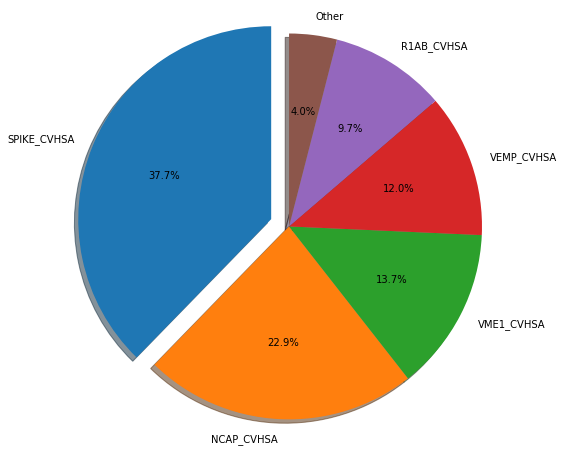

In [200]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = labels
sizes = sizes
explode = (0.1, 0.0, 0, 0,0,0)  # only "explode" the 1st slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()


In [0]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'SPIKE_WCPV_pt','R1A_WCPV_pt','NCAP_WCPV_pt','VME1_WCPV_pt','VEMP_WCPV_pt','Others'
sizes = [0.38,0.32,0.27,0.21,0.16,0.02]
explode = (0.1, 0.0, 0, 0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()


In [0]:
#Histogram for strains: top 5 most mentioned strains across the groups (includes multiple counts in one paper)
#IMPORTANT: This is proteins.


In [0]:
cvprot_counts = df_cvprot['CVPROT'].value_counts()

Text(0, 0.5, 'protein')

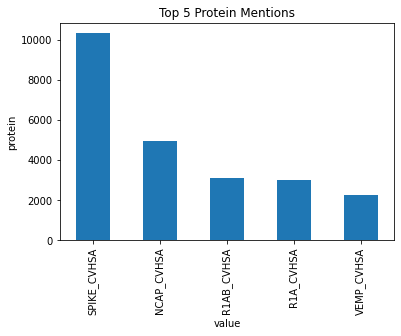

In [202]:
cvprot_counts
top_5 = cvprot_counts[0:5]
top_5
top_5.plot(kind='bar')
plt.title('Top 5 Protein Mentions')
plt.xlabel('value')
plt.ylabel('protein')


## 5. Get Strain Count Data, Create HeatMaps of Strains

In [0]:
#https://www.kaggle.com/rtatman/co-occurrence-matrix-plot-in-python
#Calculate and plot co-occurrence matrix for strains group and proteins (CVPROT). 
#Calculate and plot co-occurrence matrix for top 5 most mentioned strains across and proteins (CVPROT). 
#Use data from the block level(not paper)
#Input: dataframe from step 3
#Output: co-occurance heat maps

In [203]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [204]:
df_cvprot.shape[0], df_cvprot.PAPER_ID.nunique()  # <check the input data is block level. 


(26962, 5352)

In [0]:
#function to create counts dataframe
def df_co_occurrance(df, strain_group):
  strains_df = df.copy()  
  for i in strain_group:
        eval_match = df.SARS_COV.str.contains(i)
        strains_df[i] = eval_match
  return strains_df

In [0]:
# repeat for all strain groups
strains_df = df_co_occurrance(df_cvprot,sars_sin_strains)

sars_sins_strains


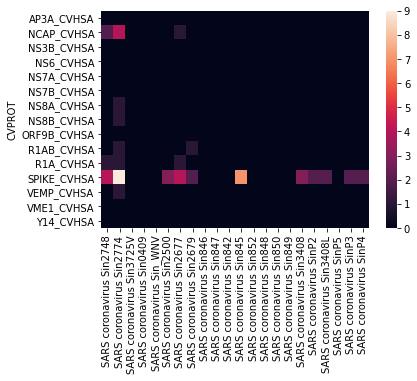

In [213]:
#transform data and create heatmap (repeat for all strain groups)
strains_df.iloc[:,4:] = strains_df.iloc[:,4:].astype(int) 
strains_df = strains_df.iloc[:,3:]
prot_strains_grpd = strains_df.groupby('CVPROT').sum()
print('sars_sins_strains')
sns.heatmap(prot_strains_grpd)

In [0]:
strains_df = df_co_occurrance(df_cvprot,sars_betacov_strains)

sars_betacov_strains


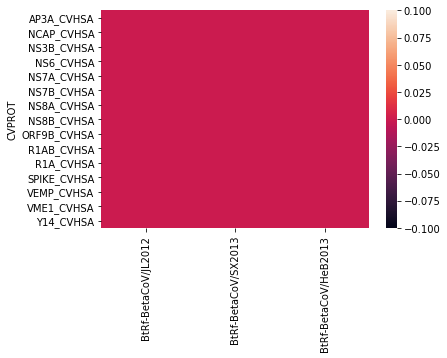

In [216]:
#transform data and create heatmap (repeat for all strain groups)
strains_df.iloc[:,4:] = strains_df.iloc[:,4:].astype(int) 
strains_df = strains_df.iloc[:,3:]
prot_strains_grpd = strains_df.groupby('CVPROT').sum()
print('sars_betacov_strains')
sns.heatmap(prot_strains_grpd)

In [0]:
strains_df = df_co_occurrance(df_cvprot,sars_tw_strains)

sars_tw_strains


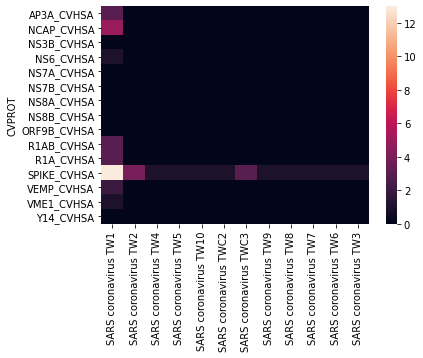

In [218]:
#transform data and create heatmap (repeat for all strain groups)
strains_df.iloc[:,4:] = strains_df.iloc[:,4:].astype(int) 
strains_df = strains_df.iloc[:,3:]
prot_strains_grpd = strains_df.groupby('CVPROT').sum()
print('sars_tw_strains')
sns.heatmap(prot_strains_grpd)

In [0]:
strains_df = df_co_occurrance(df_cvprot,sars_shanghai_strains)

sars_shanghai_strains


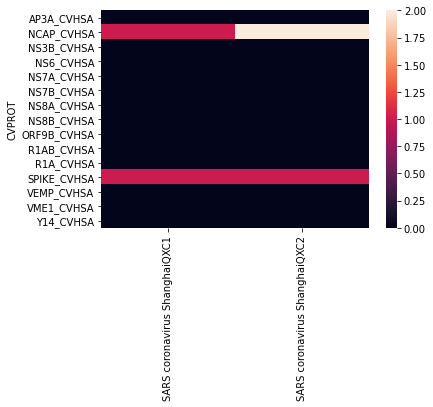

In [220]:
#transform data and create heatmap (repeat for all strain groups)
strains_df.iloc[:,4:] = strains_df.iloc[:,4:].astype(int) 
strains_df = strains_df.iloc[:,3:]
prot_strains_grpd = strains_df.groupby('CVPROT').sum()
print('sars_shanghai_strains')
sns.heatmap(prot_strains_grpd)

In [0]:
strains_df = df_co_occurrance(df_cvprot,sars_gz_strains)

sars_gz_strains


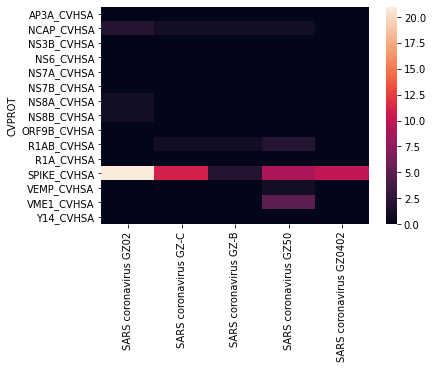

In [222]:
#transform data and create heatmap (repeat for all strain groups)
strains_df.iloc[:,4:] = strains_df.iloc[:,4:].astype(int) 
strains_df = strains_df.iloc[:,3:]
prot_strains_grpd = strains_df.groupby('CVPROT').sum()
print('sars_gz_strains')
sns.heatmap(prot_strains_grpd)

In [0]:
strains_df = df_co_occurrance(df_cvprot,sars_bj_stains)

sars_bj_strains


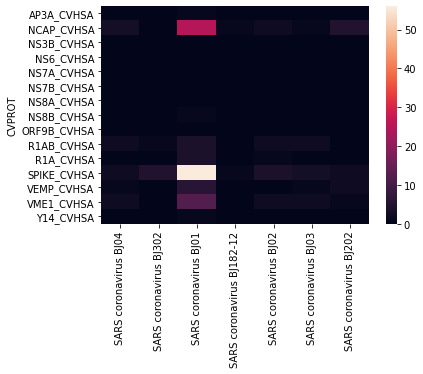

In [224]:
#transform data and create heatmap (repeat for all strain groups)
strains_df.iloc[:,4:] = strains_df.iloc[:,4:].astype(int) 
strains_df = strains_df.iloc[:,3:]
prot_strains_grpd = strains_df.groupby('CVPROT').sum()
print('sars_bj_strains')
sns.heatmap(prot_strains_grpd)

In [0]:
strains_df = df_co_occurrance(df_cvprot,sars_lc_stains)

sars_lc_strains


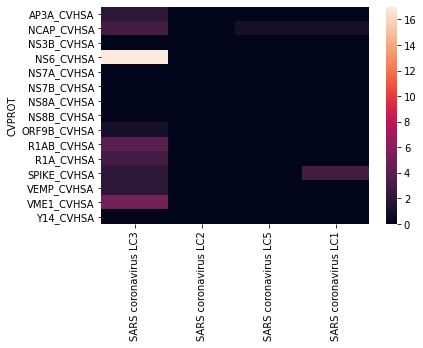

In [226]:
#transform data and create heatmap (repeat for all strain groups)
strains_df.iloc[:,4:] = strains_df.iloc[:,4:].astype(int) 
strains_df = strains_df.iloc[:,3:]
prot_strains_grpd = strains_df.groupby('CVPROT').sum()
print('sars_lc_strains')
sns.heatmap(prot_strains_grpd)